In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from missingno import matrix

In [69]:
DATA_PATH = Path() / "data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

PLOT_PATH = Path() / "plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)

In [70]:
data = load_data("McDonald_s_sentiment_final.csv")
data

,store_address,latitude,longitude,state,review_time,review,rating_count,rating_numeric,rating_to_sent,processed_review_nltk,processed_review_spacy,sentiment,compound_score
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,TX,3 months ago,Why does it look like someone spit on my food?...,"1,240",1.0,Negative,look like someone spit food normal transaction...,look like spit food normal transaction chill p...,Positive,0.7717
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,TX,5 days ago,It'd McDonalds. It is what it is as far as the...,"1,240",4.0,Positive,it'd mcdonalds. far food atmosphere go. staff ...,mcdonalds far food atmosphere staff difference...,Positive,0.8591
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,TX,5 days ago,Made a mobile order got to the speaker and che...,"1,240",1.0,Negative,made mobile order got speaker checked in. line...,mobile order got speaker checked line moving l...,Negative,-0.2960
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,TX,a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,"1,240",5.0,Positive,mc. crispy chicken sandwich customer service q...,mc crispy chicken sandwich customer service qu...,Neutral,0.0000
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,TX,2 months ago,"I repeat my order 3 times in the drive thru, a...","1,240",1.0,Negative,repeat order 3 time drive thru still manage me...,repeat order 3 times drive manage mess suppose...,Negative,-0.7184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32644,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,FL,4 years ago,They treated me very badly.,"2,810",1.0,Negative,treated badly.,treated badly,Negative,-0.4767
32645,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,FL,a year ago,The service is very good,"2,810",5.0,Positive,service good,service good,Positive,0.4404
32646,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,FL,a year ago,To remove hunger is enough,"2,810",4.0,Positive,remove hunger enough,remove hunger,Negative,-0.2500
32647,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,FL,5 years ago,"It's good, but lately it has become very expen...","2,810",5.0,Positive,good lately become expensive.,good lately expensive,Positive,0.4404


In [71]:
# Assuming 'store_address' is a column in your dataset
grouped = data.groupby('store_address', as_index=False)  # Keep 'store_address' as a column

# Calculate averages
average_scores = grouped['compound_score'].mean()
average_rates = grouped['rating_numeric'].mean()

# Combine averages into a new DataFrame
averages_df = pd.DataFrame({
    'Store Address': average_scores['store_address'],  # Directly use 'store_address' from the grouped object
    'Average Sentiment Score': average_scores['compound_score'],
    'Average Rate': average_rates['rating_numeric']
})

# Rank the stores by 'Average Sentiment Score' and add a 'Rank' column
averages_df['Rank'] = averages_df['Average Sentiment Score'].rank(ascending=False, method='max')

# Sort the DataFrame by the 'Rank' column to get the sequence based on sentiment score
averages_df = averages_df.sort_values(by='Rank')

# Show the DataFrame
averages_df


,Store Address,Average Sentiment Score,Average Rate,Rank
7,"114 Delancey St, New York, NY 10002, United St...",0.776033,3.333333,1.0
25,"555 13th St NW, Washington, DC 20004, United S...",0.565267,2.666667,2.0
30,"6875 Sand Lake Rd, Orlando, FL 32819, United S...",0.534507,3.687755,3.0
12,"160 Broadway, New York, NY 10038, United States",0.406800,2.333333,4.0
33,"702-2 Haddonfield-Berlin Rd, Voorhees Township...",0.284223,3.614240,5.0
32,"7010 Bradlick Shopping Center, Annandale, VA 2...",0.272875,3.698835,6.0
21,"429 7th Ave, New York, NY 10001, United States",0.270647,3.692713,7.0
3,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",0.263588,3.465753,8.0
19,"262 Canal St, New York, NY 10013, United States",0.261712,3.133829,9.0
27,"5920 Balboa Ave, San Diego, CA 92111, United S...",0.252499,3.598182,10.0


In [72]:
# Export to CSV
save_data(averages_df, "McDonald_s_Reviews_Averages.csv")


In [73]:
import spacy
from collections import defaultdict
from spacy.lang.en.stop_words import STOP_WORDS

# Load Spacy's English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Initialize a dictionary to hold word counts for each store
word_counts_by_store = defaultdict(lambda: defaultdict(int))

# Preprocess and tokenize the reviews
for _, row in data.iterrows():
    store_address = row['store_address']
    review = row['processed_review_nltk']
    doc = nlp(str(review))
    
    # Increment word counts for this store, excluding stopwords and non-alphabetic words
    for token in doc:
        if token.text.lower() not in STOP_WORDS and token.is_alpha:
            word_counts_by_store[store_address][token.text.lower()] += 1

# For demonstration, let's take a quick peek at the first store's word counts
first_store_address = next(iter(word_counts_by_store.keys()))
first_store_word_counts = word_counts_by_store[first_store_address]

first_store_word_counts_sorted = sorted(first_store_word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

first_store_word_counts_sorted


[('order', 143),
 ('food', 135),
 ('good', 123),
 ('service', 113),
 ('excellent', 102),
 ('drive', 79),
 ('time', 76),
 ('mcdonald', 74),
 ('fast', 70),
 ('great', 57)]

Saving figure word_cloud


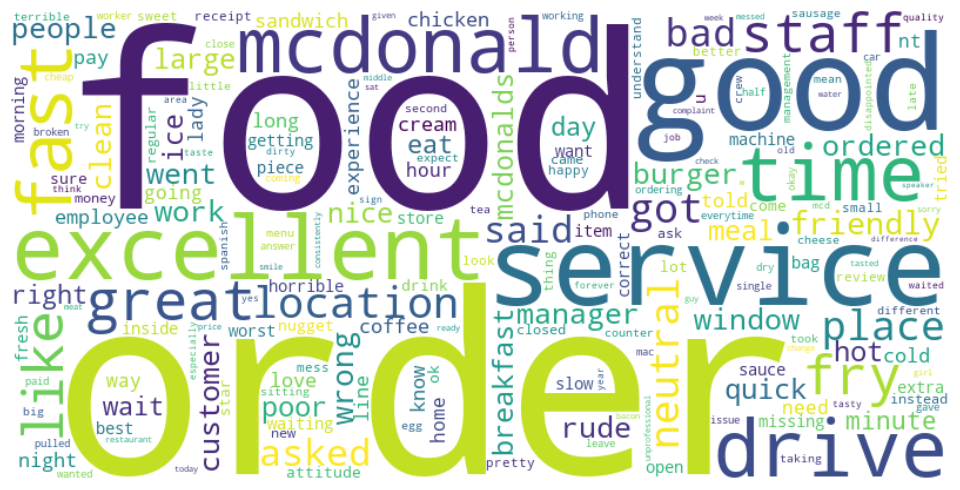

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'first_store_word_counts' is a dictionary of word frequencies for the first store
word_frequencies = {word: count for word, count in first_store_word_counts.items()}

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_frequencies)

# Display the generated word cloud:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Don't show axes for a cleaner look
save_fig("word_cloud")
plt.show()


In [75]:
from collections import defaultdict, Counter
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.util import ngrams

# Ensure required NLTK data is downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Define a simple tokenizer function
def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Custom stopwords list
STOP_WORDS = set(stopwords.words('english')) | {'order', 'food', 'service', 'mcdonald', 'drive', 'place', 'get', 'got', 'one', 'time', 'like', 'go', 'would', 'could'}

def extract_extended_phrases(text):
    # Tokenize and POS tag
    tokens = word_tokenize(text.lower())
    tagged_tokens = pos_tag(tokens)
    
    # Generate bigrams and trigrams
    bi_grams = ngrams(tagged_tokens, 2)
    tri_grams = ngrams(tagged_tokens, 3)
    
    # Define patterns to look for
    patterns = [
        ('JJ', 'NN'),  # Adjective-Noun
        ('NN', 'NN'),  # Noun-Noun
        ('RB', 'JJ'),  # Adverb-Adjective (only if the adjective doesn't follow 'not' or similar negations)
        ('VB', 'RB'),  # Verb-Adverb
        ('VB', 'NN')   # Verb-Noun
    ]
    
    # Trigram patterns
    tri_patterns = [
        ('JJ', 'NN', 'NN'),  # Adjective-Noun-Noun
        ('RB', 'JJ', 'NN'),  # Adverb-Adjective-Noun
        ('NN', 'IN', 'NN')   # Noun-Preposition-Noun
    ]
    
    # Extract phrases based on bigram patterns
    phrases = [' '.join([a, b]) for ((a, tag_a), (b, tag_b)) in bi_grams if (tag_a, tag_b) in patterns]
    
    # Extract phrases based on trigram patterns
    phrases += [' '.join([a, b, c]) for ((a, tag_a), (b, tag_b), (c, tag_c)) in tri_grams if (tag_a, tag_b, tag_c) in tri_patterns]
    
    return phrases

# Initialize a dictionary to hold word counts for each store, now focusing on phrases
word_counts_by_store_phrases = defaultdict(Counter)

# Assuming 'data' is your DataFrame and has been loaded correctly
for _, row in data.iterrows():
    store_address = row['store_address']  # Adjusted to match your dataset column names
    review = row['processed_review_nltk']  # This should be the column name that contains the review text
    phrases = extract_extended_phrases(str(review))
    
    # Increment phrase counts for this store, excluding phrases with words in STOP_WORDS
    filtered_phrases = [' '.join(phrase.split()) for phrase in phrases if all(word not in STOP_WORDS for word in phrase.split())]
    word_counts_by_store_phrases[store_address].update(filtered_phrases)

# Example: Take a quick peek at the first store's phrase counts
first_store_address_phrases = next(iter(word_counts_by_store_phrases.keys()))
first_store_phrase_counts = word_counts_by_store_phrases[first_store_address_phrases].most_common(10)

first_store_phrase_counts



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TYS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TYS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('ice cream', 17),
 ('friendly staff', 9),
 ('cream machine', 8),
 ('happy meal', 7),
 ('big mac', 6),
 ('sweet tea', 5),
 ('quarter pounder', 5),
 ('answer phone', 5),
 ('fast friendly', 5),
 ('always good', 5)]

Saving figure top_phrases_by_store


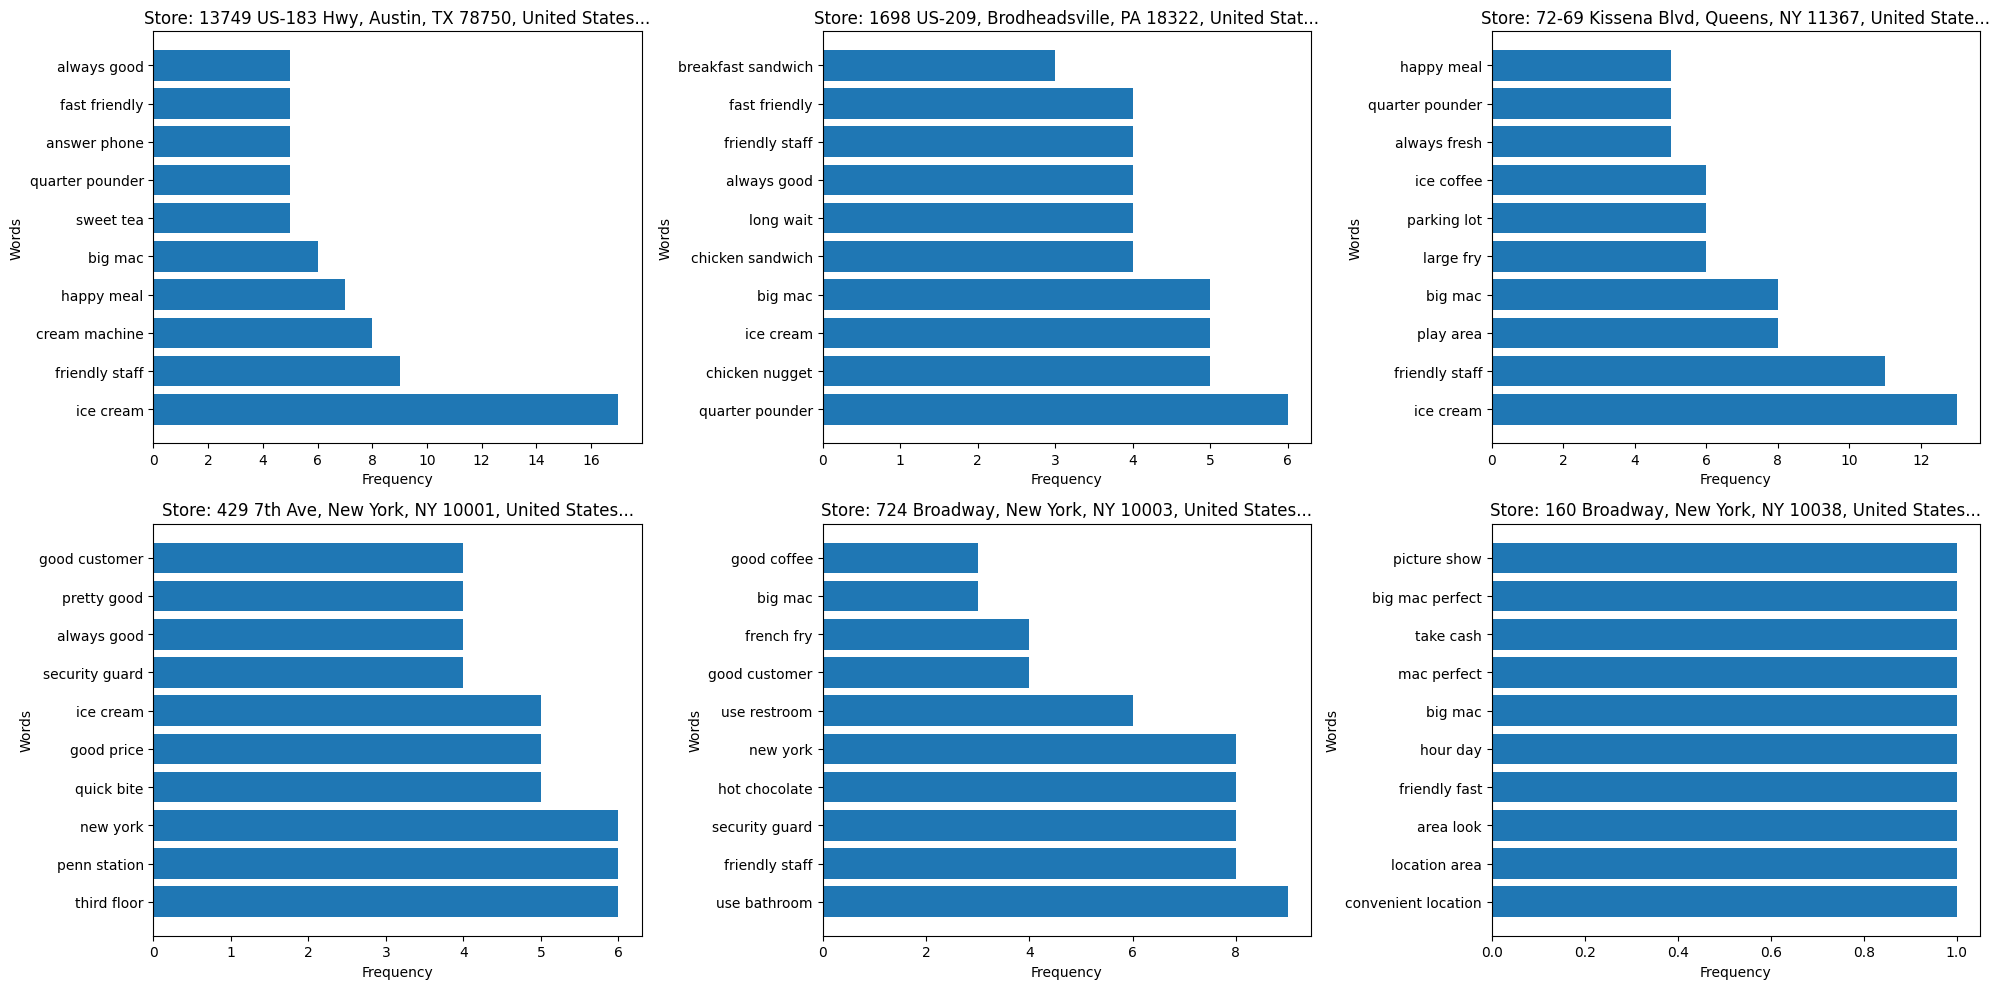

In [76]:
import matplotlib.pyplot as plt

# Select a few stores for visualization
selected_stores = list(word_counts_by_store_phrases.keys())[:6]  # Taking the first 6 stores for demonstration

plt.figure(figsize=(20, 10))

for i, store_address in enumerate(selected_stores, 1):
    # Get the top 10 most common words for the store
    word_counts = word_counts_by_store_phrases[store_address].most_common(10)
    words, counts = zip(*word_counts)
    
    plt.subplot(2, 3, i)
    plt.barh(words, counts)
    plt.title(f'Store: {store_address[:50]}...')  # Truncate address for readability
    plt.xlabel('Frequency')
    plt.ylabel('Words')

plt.tight_layout()
save_fig("top_phrases_by_store")
plt.show()


Saving figure last_phrases_by_store


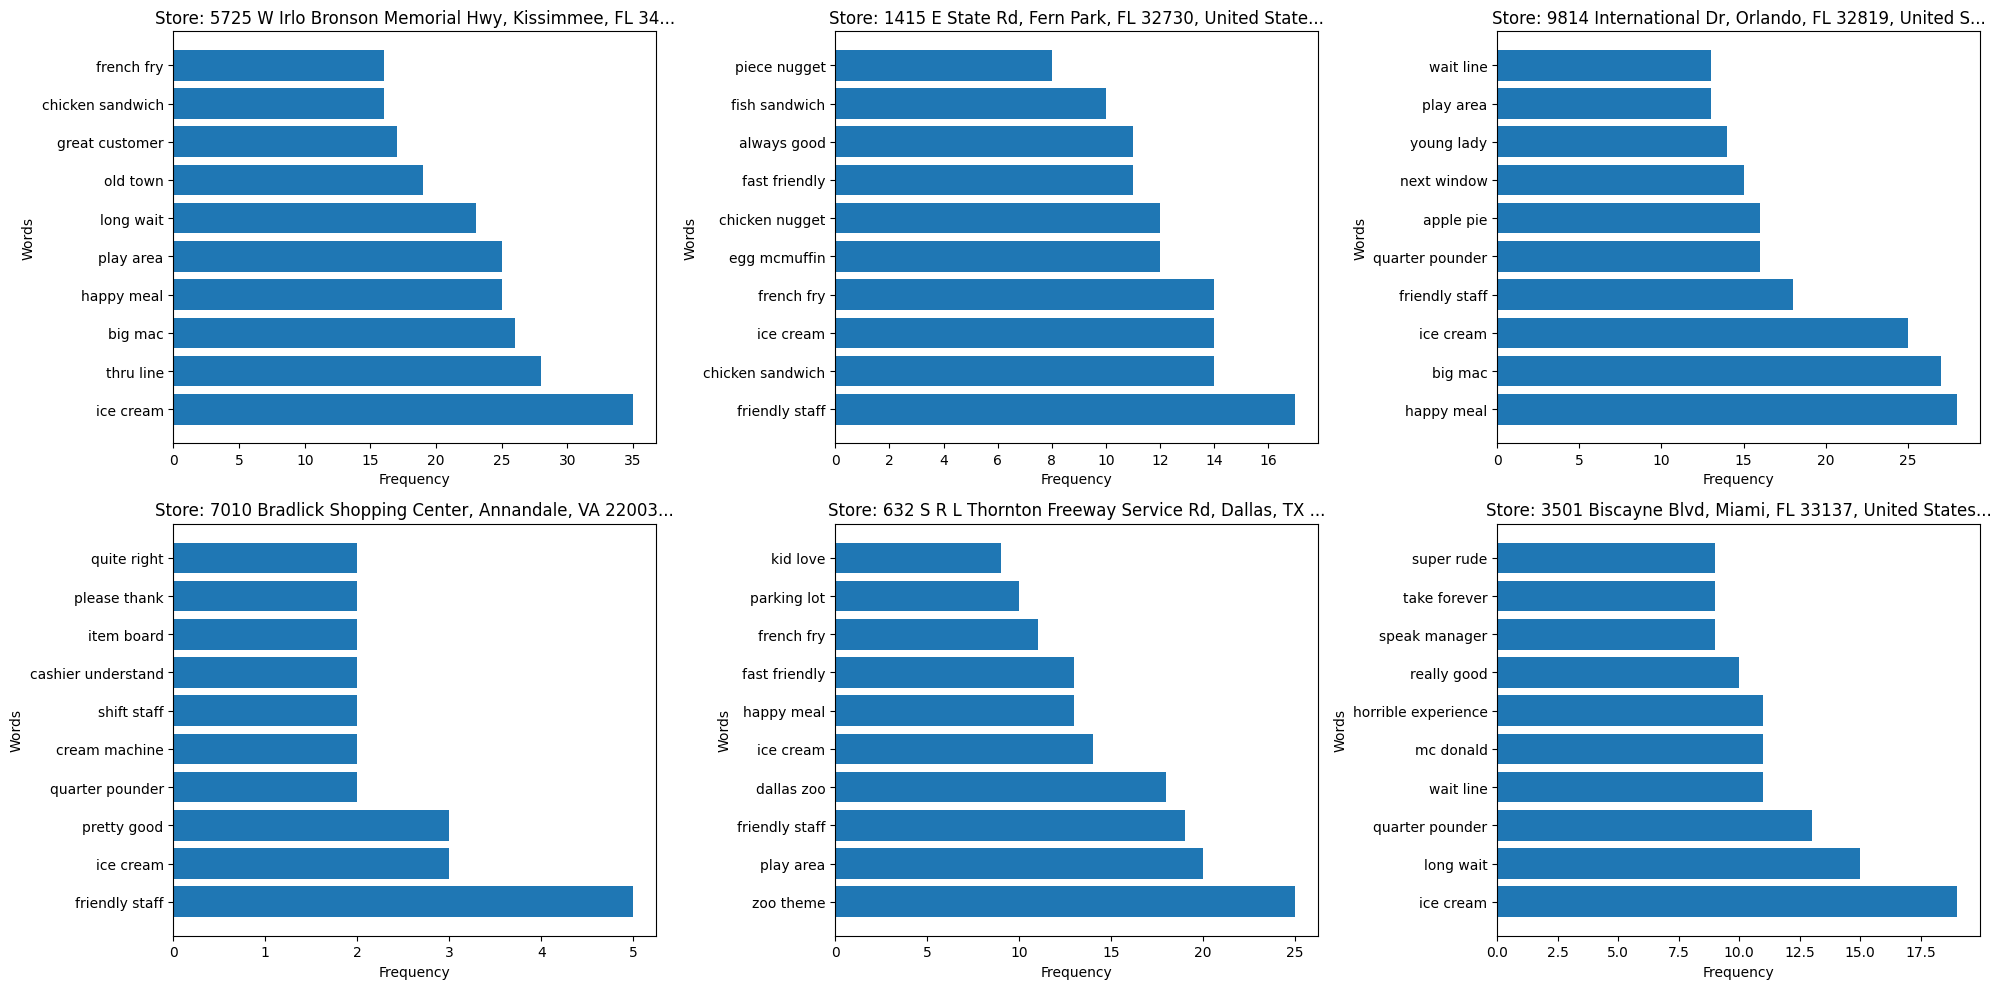

In [77]:
import matplotlib.pyplot as plt

# Select a few stores for visualization
selected_stores = list(word_counts_by_store_phrases.keys())[-6:]  # Taking the last 6 stores for demonstration

plt.figure(figsize=(20, 10))

for i, store_address in enumerate(selected_stores, 1):
    # Get the top 10 most common words for the store
    word_counts = word_counts_by_store_phrases[store_address].most_common(10)
    words, counts = zip(*word_counts)
    
    plt.subplot(2, 3, i)
    plt.barh(words, counts)
    plt.title(f'Store: {store_address[:50]}...')  # Truncate address for readability
    plt.xlabel('Frequency')
    plt.ylabel('Words')

plt.tight_layout()
save_fig("last_phrases_by_store")
plt.show()

In [78]:
# Assuming the original data is already loaded in 'data'
# Create a new column with the top 10 word frequency dictionaries for each store_address

# Generate the top 10 word frequency dictionary for each store
top_10_word_freqs = {store: dict(word_counts.most_common(10)) for store, word_counts in word_counts_by_store_phrases.items()}

# Map the top 10 word frequencies to each row based on store_address
data['Top_10_Word_Frequencies'] = data['store_address'].apply(lambda x: top_10_word_freqs.get(x, {}))




In [79]:
# Merge the datasets on their address columns
merged_df = pd.merge(averages_df, data[['store_address', 'Top_10_Word_Frequencies','latitude','longitude']],
                     left_on='Store Address', right_on='store_address', how='left')

# Drop the duplicate 'store_address' column after merging
merged_df.drop(columns=['store_address'], inplace=True)

# Remove duplicate rows based on the 'Store Address' column while keeping the first occurrence
merged_df_unique = merged_df.drop_duplicates(subset=['Store Address']).reset_index(drop=True)

# Display the first few rows of the deduplicated dataframe
merged_df_unique.head()


,Store Address,Average Sentiment Score,Average Rate,Rank,Top_10_Word_Frequencies,latitude,longitude
0,"114 Delancey St, New York, NY 10002, United St...",0.776033,3.333333,1.0,"{'pretty decent': 1, 'east side': 1, 'spacious...",40.718838,-73.988280
1,"555 13th St NW, Washington, DC 20004, United S...",0.565267,2.666667,2.0,"{'artistic wall': 1, 'clean plenty': 1, 'plent...",38.896980,-77.028913
2,"6875 Sand Lake Rd, Orlando, FL 32819, United S...",0.534507,3.687755,3.0,"{'pizza pasta': 63, 'play area': 59, 'ice crea...",28.450387,-81.471414
3,"160 Broadway, New York, NY 10038, United States",0.406800,2.333333,4.0,"{'convenient location': 1, 'location area': 1,...",40.709375,-74.009979
4,"702-2 Haddonfield-Berlin Rd, Voorhees Township...",0.284223,3.614240,5.0,"{'big mac': 8, 'french fry': 7, 'quarter pound...",39.852059,-74.981099


In [80]:
save_data(merged_df_unique, "McDonald_s_Reviews_Averages_With_Top_10_Word_Frequencies.csv")

In [83]:
import folium


m = folium.Map(location=[merged_df_unique['latitude'].mean(), merged_df_unique['longitude'].mean()], zoom_start=5)

import folium

for _, row in merged_df_unique.iterrows():
    # Create an HTML iframe with your desired width
    iframe = folium.IFrame(
        f"""
    <div style="width:250px;">
        <strong>Store Address:</strong> {row['Store Address']}<br>
        <strong>Average Sentiment Score:</strong> {row['Average Sentiment Score']}<br>
        <strong>Average Rate:</strong> {row['Average Rate']}<br>
        <strong>Top 10 Words:</strong><br>
        {row['Top_10_Word_Frequencies']}
    </div>
    """,
        width=400,  # Adjust width as needed
        height=300  # Adjust height as needed
    )
    
    # Create a Popup from the IFrame
    popup = folium.Popup(iframe)
    
    # Create and add a marker to the map with the popup
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup
    ).add_to(m)

# Save map or display
file_path = str(PLOT_PATH) + "/McDonald's Store Details.html"
m.save(file_path)
